In [1]:
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)
import random
from  keras.preprocessing.image import save_img
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import io
import os
import yaml
from Util import *
from IPython import display
import copy
%matplotlib inline

In [2]:
#Global configuration
attackMode = 'Raw' #Raw: means without defense, Detection: With adversarial exmaples detection
queryBudgets = 500 #Query Budgets
random.seed(42) #Set random seeds

2: 0.99999905
3: 6.203192e-07
8: 2.3220609e-07
7: 5.150757e-08
1: 4.19794e-08
0: 2.5198027e-10


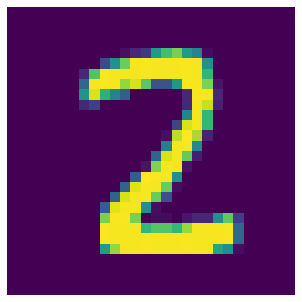

In [3]:
#Select random target image
oriImg= randomimg(mode = attackMode)
display_images(oriImg.img)

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:6.158855683257908, Linf:0.3133352994918823


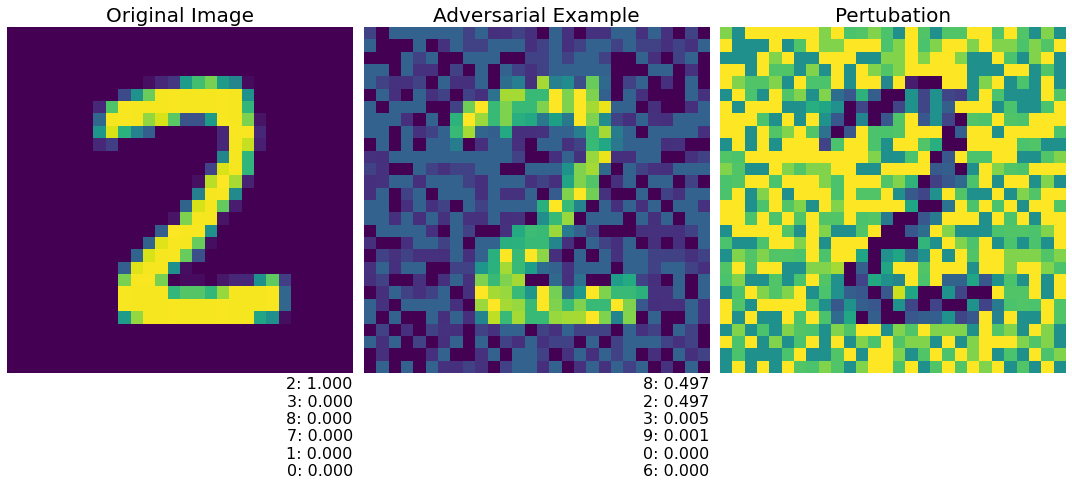

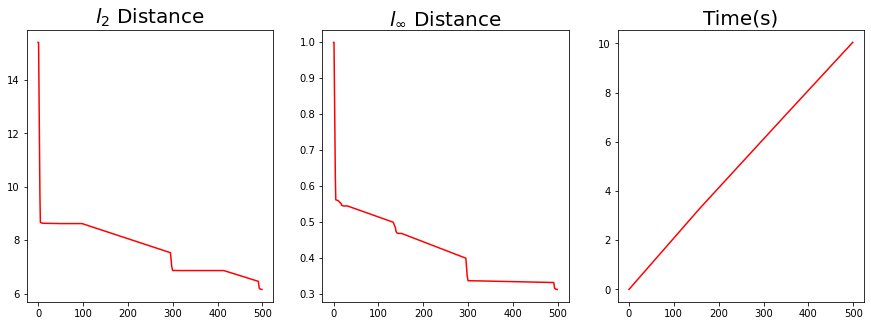

In [4]:
#HJSA attack
from HJSA import hsja
constraint = 'linf'#norm: l2; linf
oriImg_copy = copy.deepcopy(oriImg)
with tf.device('/GPU:0'): 
        timehistory,adversarial = hsja(oriImg_copy,constraint=constraint,
                                                  max_query=queryBudgets,verbose=False)
print('Attack result: L2:{0}, Linf:{1}'.format(oriImg_copy.maxl2,oriImg_copy.maxlinf))
History=[oriImg_copy.historyl2,oriImg_copy.historylinf,timehistory]
DemoVisulization(oriImg_copy.img,adversarial,History,queryBudgets)

  0%|          | 0/500 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Attack result: L2:3.494670867919922, Linf:0.012745141983032227


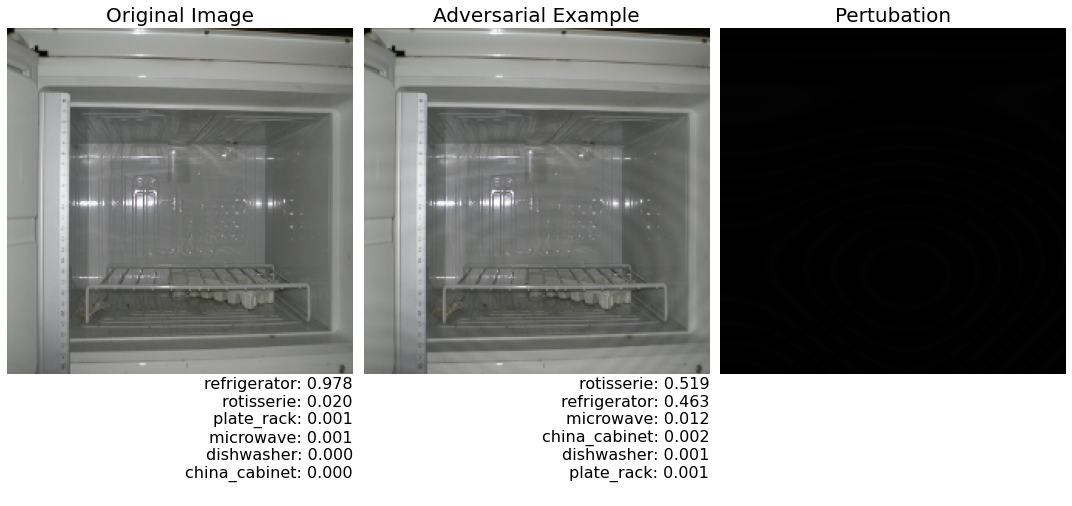

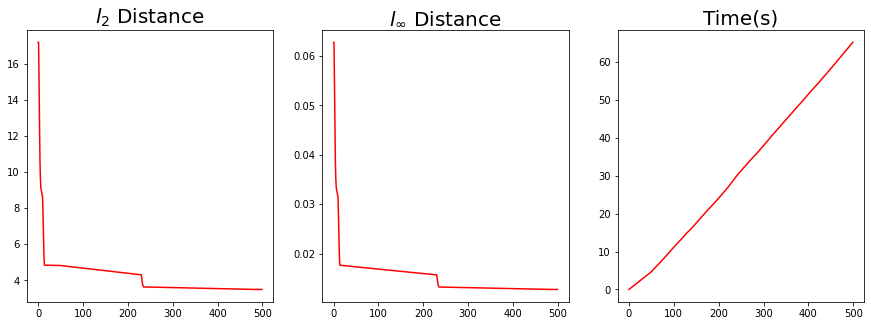

In [4]:
#BO-DBA attack
from BODBA import bayesian_attack
noiseGenerator = 'perlin'#Options: perlin; gabor; BICU; BILI; CLUSTER; NN
constraint = 'linf'#norm: l2; linf
oriImg_copy = copy.deepcopy(oriImg)
with tf.device('/GPU:0'): 
        timehistory,adversarial = bayesian_attack(oriImg_copy,max_query=queryBudgets,
                                                             noise=noiseGenerator,constraint=constraint,init_query=5)
print('Attack result: L2:{0}, Linf:{1}'.format(oriImg_copy.maxl2,oriImg_copy.maxlinf))
History=[oriImg_copy.historyl2,oriImg_copy.historylinf,timehistory]
        
DemoVisulization(oriImg_copy.img,adversarial,History,queryBudgets)

Searching for the initial direction on 100 random directions: 
--------> Found distortion 27.9556
--------> Found distortion 16.2301
--------> Found distortion 13.3494
--------> Found distortion 13.2965
--------> Found distortion 11.7513
--------> Found distortion 10.4344
==========> Found best distortion 10.4344 in 6.0940 seconds using 270 queries: 275
Attack result: L2:5.891869672321607, Linf:0.6437268763068813


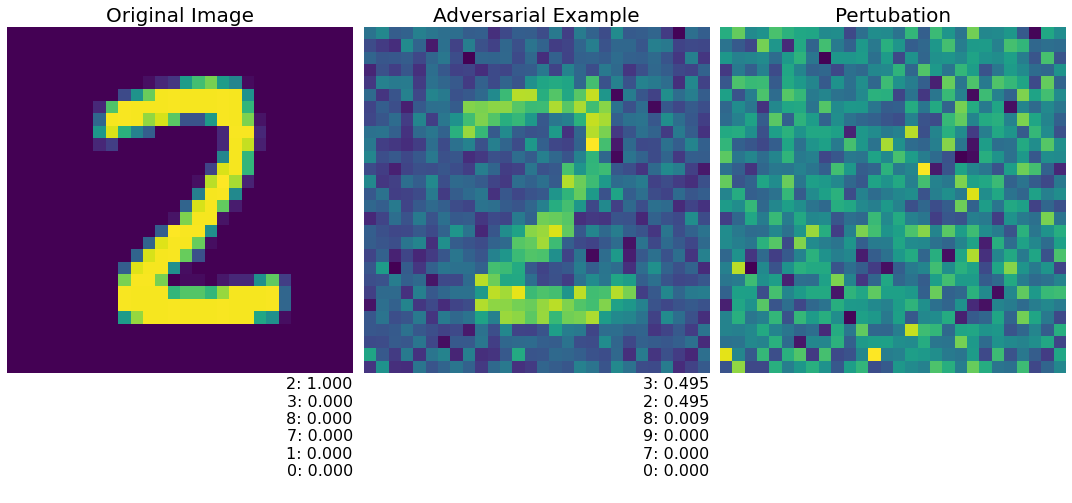

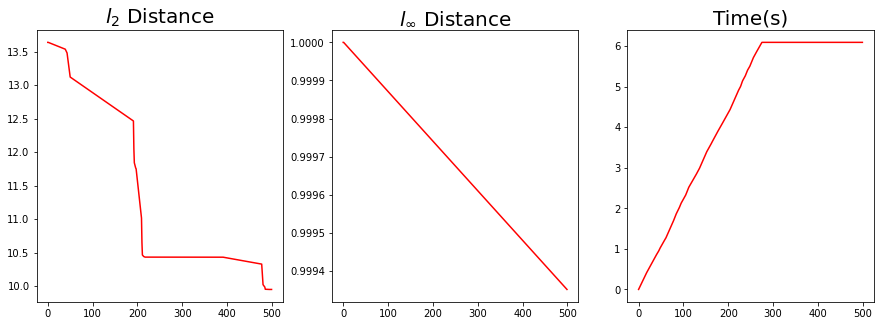

In [4]:
#SignOPT attack
from SignOPT import OPT_attack_sign_SGD
oriImg_copy = copy.deepcopy(oriImg)
attack = OPT_attack_sign_SGD(oriImg_copy)
with tf.device('/GPU:0'):
    timehistory,adversarial=attack.attack_untargeted(query_limit=queryBudgets)
print('Attack result: L2:{0}, Linf:{1}'.format(oriImg_copy.maxl2,oriImg_copy.maxlinf))
History=[oriImg_copy.historyl2,oriImg_copy.historylinf,timehistory]
        
DemoVisulization(oriImg_copy.img,adversarial,History,queryBudgets)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Attack result: L2:8.61784553527832, Linf:0.022218406200408936


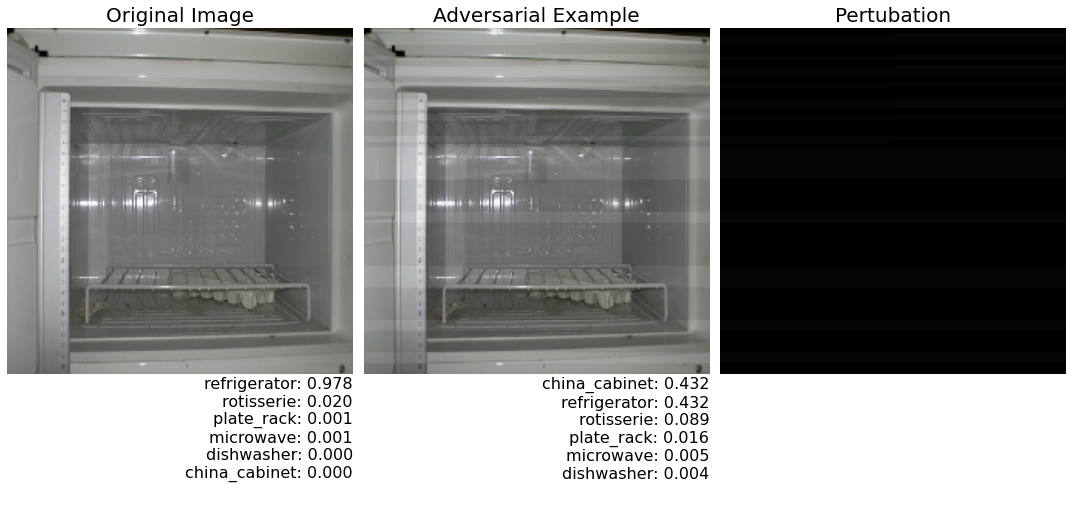

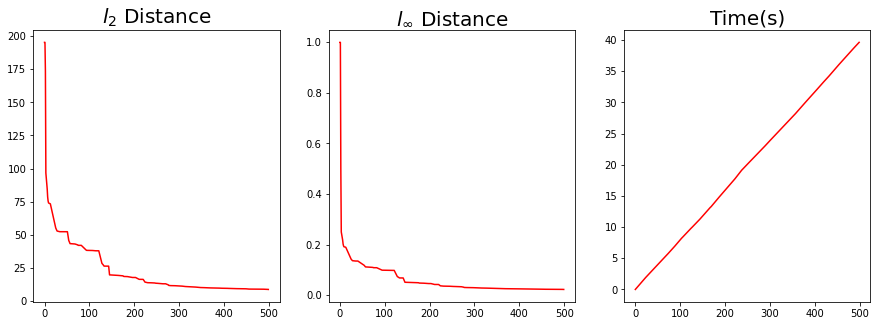

In [6]:
#RayS attack
from RayS import RayS
oriImg_copy = copy.deepcopy(oriImg)
attack = RayS(oriImg_copy,order=np.inf, epsilon=0.3, early_stopping=False)
with tf.device('/GPU:0'):
    timehistory,adversarial=attack.attack_hard_label(query_limit=queryBudgets)
print('Attack result: L2:{0}, Linf:{1}'.format(oriImg_copy.maxl2,oriImg_copy.maxlinf))
History=[oriImg_copy.historyl2,oriImg_copy.historylinf,timehistory]
        
DemoVisulization(oriImg_copy.img,adversarial,History,queryBudgets)

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:inf, Linf:inf


ValueError: array of sample points is empty

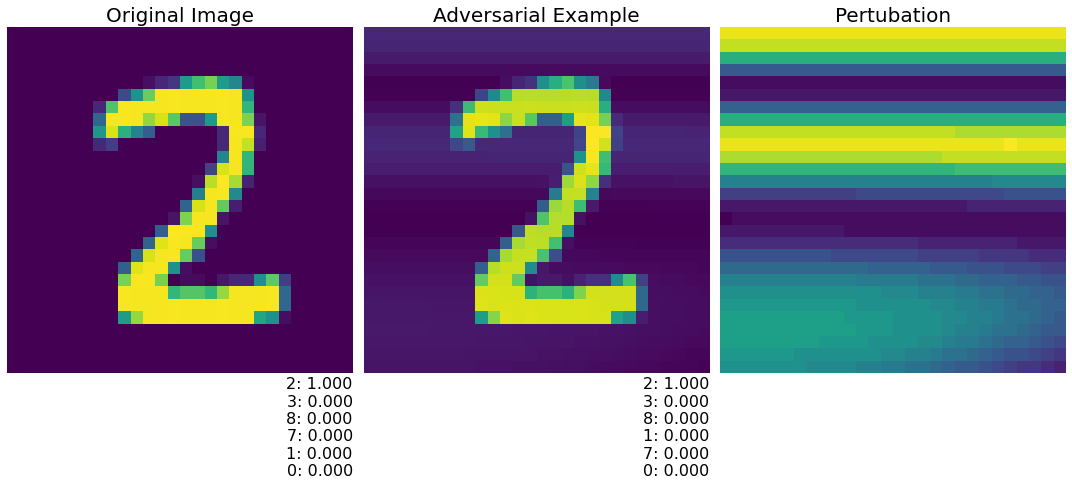

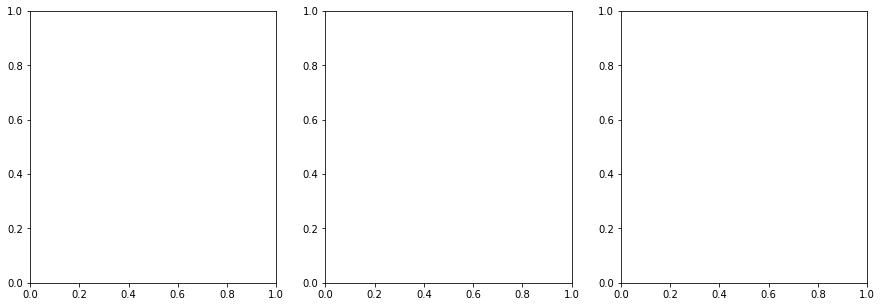

In [7]:
#Procedural attack
#Notes that the computation cost of Procedural attack is very high.
noiseGenerator = 'perlin'#Options: perlin; gabor;
constraint = 'linf'#norm: l2; linf
oriImg_copy = copy.deepcopy(oriImg)
with tf.device('/GPU:0'): 
        timehistory,adversarial = bayesian_attack_Score(oriImg_copy, max_query=queryBudgets,
                                                                   noise=noiseGenerator)
print('Attack result: L2:{0}, Linf:{1}'.format(oriImg_copy.maxl2,oriImg_copy.maxlinf))
History=[oriImg_copy.historyl2,oriImg_copy.historylinf,timehistory]
        
DemoVisulization(oriImg_copy.img,adversarial,History,queryBudgets)

In [10]:
#BO-DBA attack with BICU
noiseGenerator = 'BICU'#Options: perlin; gabor; BICU; BILI; CLUSTER; NN
constraint = 'linf'#norm: l2; linf
oriImg_copy = copy.deepcopy(oriImg)
with tf.device('/GPU:0'): 
        success,adversarial,History,result = bayesian_attack(oriImg_copy,max_query=queryBudgets,
                                                             noise=noiseGenerator,constraint=constraint)
if not success:
    print('Attack sucess: {0}, L2:{1}, Linf:{2}'.format(success,result[0],result[1]))
else:
    print('Attack sucess: {0}, L2:{1}, Linf:{2}'.format(success,result[0],result[1]))
        
DemoVisulization(oriImg_copy.img,adversarial,History,queryBudgets)

  0%|          | 0/500 [00:00<?, ?it/s]

InvalidArgumentError: Incompatible shapes: [1,28,28,1] vs. [1,224,224,3] [Op:AddV2]

In [ ]:
#BayesOPT attack
#Notes that the computation cost of BayesOPT attack is very high.
noiseGenerator = 'BICU'#Options: BICU; BILI; NN; CLUSTER
constraint = 'linf'#norm: l2; linf
oriImg_copy = copy.deepcopy(oriImg)
with tf.device('/GPU:0'): 
        success,adversarial,History,result = bayesian_attack_Score(oriImg_copy, max_query=queryBudgets,
                                                                   noise=noiseGenerator)
if not success:
    print('Attack sucess: {0}, L2:{1}, Linf:{2}'.format(success,result[0],result[1]))
else:
    print('Attack sucess: {0}, L2:{1}, Linf:{2}'.format(success,result[0],result[1]))
        
DemoVisulization(oriImg_copy.img,adversarial,History,queryBudgets)


In [5]:
#HJSA attack

constraint = 'linf'#norm: l2; linf
oriImg_copy = copy.deepcopy(oriImg)
with tf.device('/GPU:0'): 
        timehistory,adversarial = hsja(oriImg_copy,constraint=constraint,
                                                  max_query=queryBudgets,verbose=False)
print('Attack result: L2:{0}, Linf:{1}'.format(oriImg_copy.maxl2,oriImg_copy.maxlinf))
History=[oriImg_copy.historyl2,oriImg_copy.historylinf,timehistory]
DemoVisulization(oriImg_copy.img,adversarial,History,queryBudgets)
print(History[1])

ValueError: cannot reshape array of size 1 into shape (1,28,28,1)

  0%|          | 0/500 [00:00<?, ?it/s]

Attack result: L2:6.948476791381836, Linf:0.45493966341018677
[[1, 0.9981565339752749], [3, 0.74861735], [4, 0.6238478], [5, 0.56146306], [7, 0.54586685], [12, 0.54537946], [13, 0.54513574], [14, 0.5450139], [15, 0.544953], [17, 0.5449378], [18, 0.54493016], [19, 0.54492635], [20, 0.54492444], [28, 0.51380557], [30, 0.50524217], [32, 0.50310135], [33, 0.5020309], [35, 0.5017633], [36, 0.5016295], [37, 0.5015626], [39, 0.50154585], [44, 0.5015453], [54, 0.4971811], [59, 0.48164418], [63, 0.4806731], [65, 0.48043033], [66, 0.48030898], [67, 0.48024827], [71, 0.4802445], [72, 0.4802426], [128, 0.47976136], [130, 0.47928727], [132, 0.47916874], [136, 0.47916135], [248, 0.4660266], [254, 0.45874494], [259, 0.45851737], [261, 0.4584605], [263, 0.45844626], [264, 0.45843914], [266, 0.45843738], [268, 0.45843694], [297, 0.45527747], [302, 0.45516178], [304, 0.4551329], [305, 0.45511842], [306, 0.4551112], [307, 0.45510757], [308, 0.45510578], [309, 0.45510486], [310, 0.4551044], [329, 0.455098

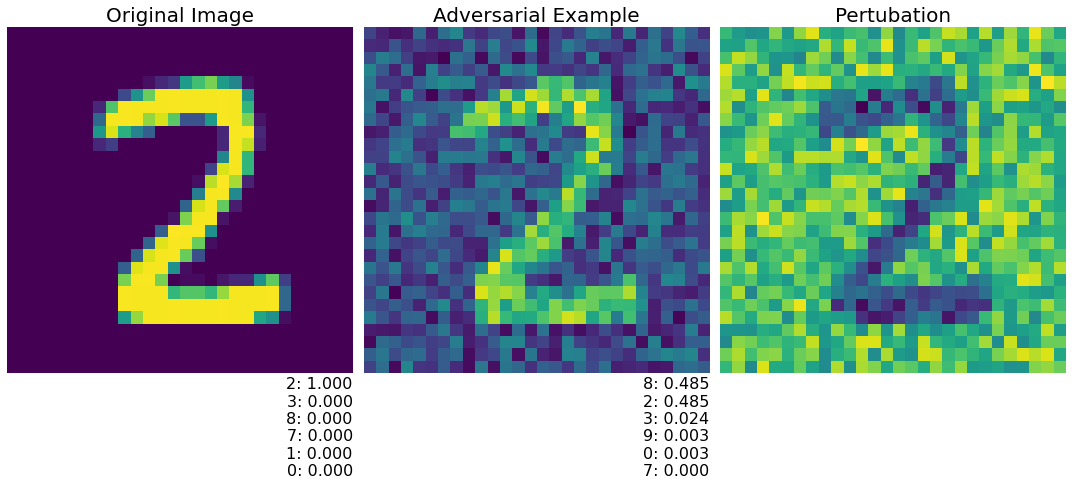

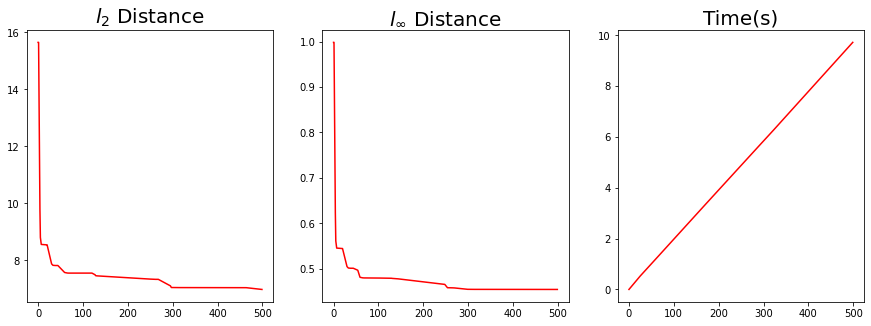

In [4]:
#Query attack
constraint = 'linf'#norm: l2; linf
oriImg_copy = copy.deepcopy(oriImg)
with tf.device('/GPU:0'): 
        timehistory,adversarial =  attack_untargeted(imgobj=oriImg_copy, alpha = 0.2, 
                                                                beta = 0.001, max_query=queryBudgets)
print('Attack result: L2:{0}, Linf:{1}'.format(oriImg_copy.maxl2,oriImg_copy.maxlinf))
History=[oriImg_copy.historyl2,oriImg_copy.historylinf,timehistory]
DemoVisulization(oriImg_copy.img,adversarial,History,queryBudgets)
print(History[1])